In [30]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')

In [31]:
training_data = pd.read_csv("../Data_in_csv/sample.csv",na_values = 'na')
training_data.head()

,Course,Section,Faculty,Time,Room,Seats Available
0,ACT201,1.0,RNH,MW 01:00 PM - 02:30 PM,NAC201,0.0
1,ACT201,2.0,TsA,MW 08:00 AM - 09:30 AM,NAC311,0.0
2,ACT201,3.0,MdM,MW 02:40 PM - 04:10 PM,NAC201,0.0
3,ACT201,4.0,HHq1,MW 04:20 PM - 05:50 PM,NAC210,0.0
4,ACT201,5.0,ASy,MW 09:40 AM - 11:10 AM,NAC201,0.0


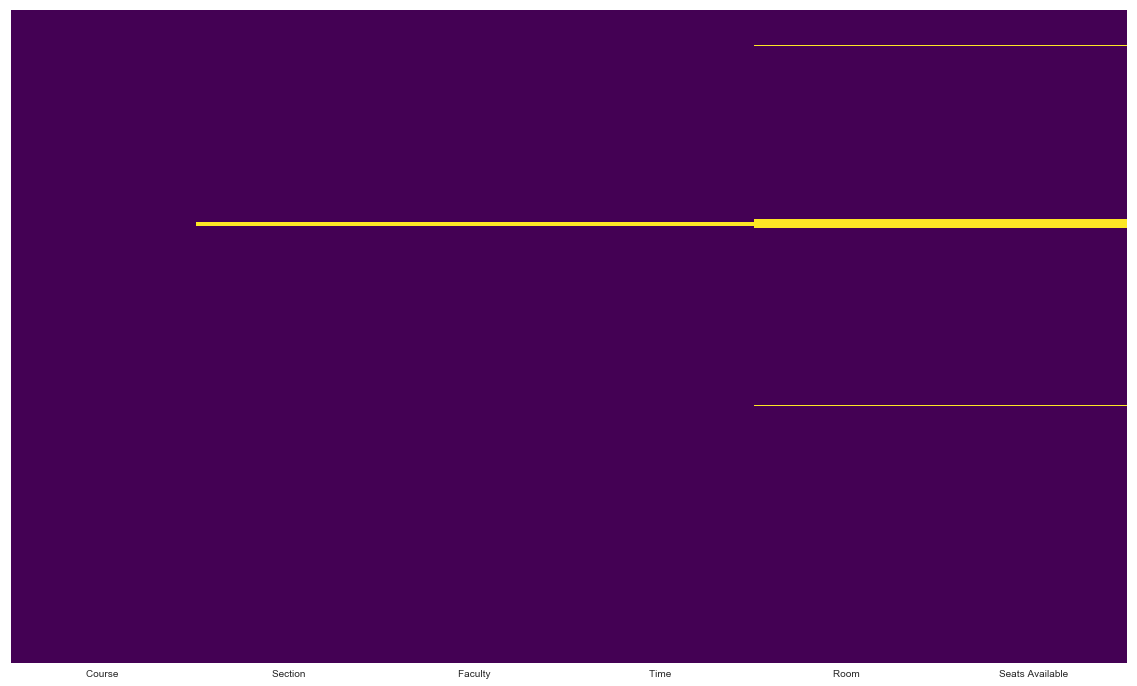

In [32]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [33]:
training_data = training_data.dropna(axis=0)

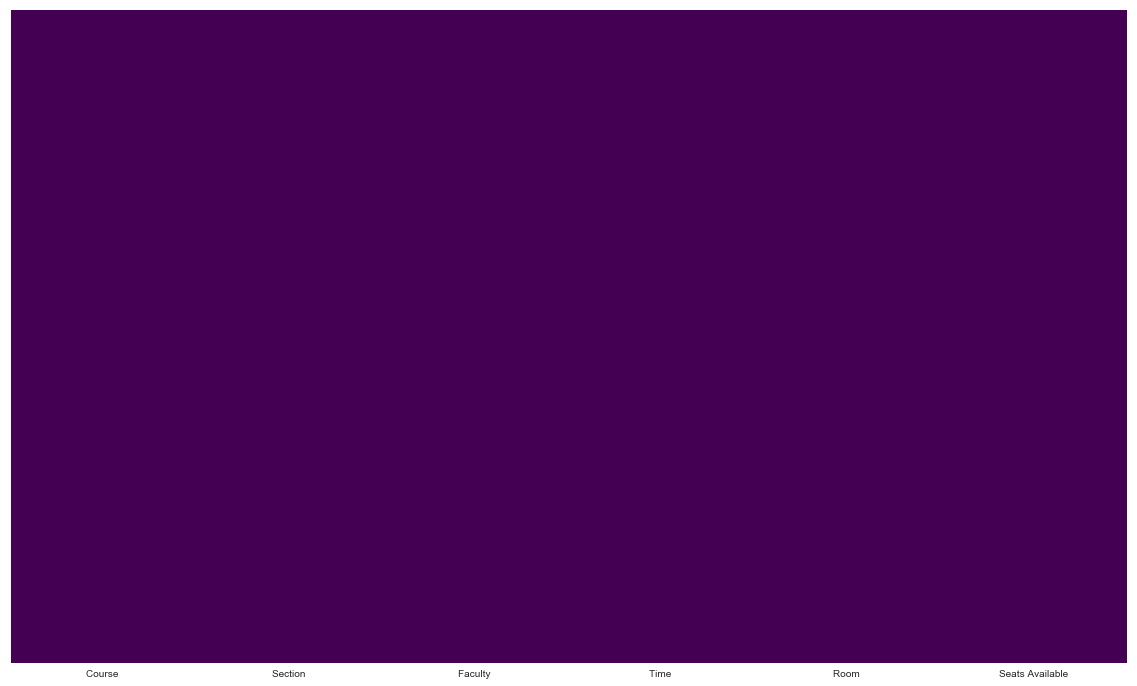

In [34]:
plt.figure(figsize=(20,12))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

# No missing values

In [35]:
training_data.keys()

Index(['Course ', 'Section ', 'Faculty ', 'Time ', 'Room ', 'Seats Available'], dtype='object')

In [36]:
X = training_data.drop(['Faculty ','Seats Available'],axis = 1)
y = training_data['Faculty ']

In [37]:
indices = X.index

In [38]:
y.head()

0     RNH 
1     TsA 
2     MdM 
3    HHq1 
4     ASy 
Name: Faculty , dtype: object

# preprocessing

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
backupX = X.copy()
backupy = y.copy()

In [46]:
def labelEncoding(dfName,featureName):
    dfName[featureName] = le.fit_transform(dfName[featureName])
    return dfName.head()

In [47]:
X.keys()

Index(['Course ', 'Section ', 'Time ', 'Room '], dtype='object')

In [48]:
labelEncoding(X,'Course ')
labelEncoding(X,'Time ')
labelEncoding(X,'Room ')

,Course,Section,Time,Room
0,0,1.0,43,29
1,0,2.0,47,54
2,0,3.0,45,29
3,0,4.0,46,38
4,0,5.0,48,29


In [52]:
X.head()

,Course,Section,Time,Room
0,0,1.0,43,29
1,0,2.0,47,54
2,0,3.0,45,29
3,0,4.0,46,38
4,0,5.0,48,29


In [53]:
y = le.fit_transform(y)

In [54]:
y

array([486, 675, 378, ..., 213, 213, 287])

# Model implementation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
logmodel = LogisticRegression()

In [58]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
prediction = logmodel.predict(X_test)

In [63]:
def aucForThreshold(X_test,y_test,model):
    """
    return roc auc curve for determining the optimal threshold
    model = desired model's instance
    """
    from sklearn.metrics import roc_auc_score,roc_curve
    logit_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper center")
    plt.savefig('Log_ROC')


    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='g',linestyle='dashed', color='g',label = 'Threshold')
    ax2.set_ylabel('Threshold',color='g')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    plt.legend(loc="lower right")
    plt.savefig('roc_and_threshold.png')
    plt.show()

In [65]:
def evaluationScores(y_test,prediction):
    acc = metrics.accuracy_score(y_test, prediction)
    r2 = metrics.r2_score(y_test, prediction)
    f1 = metrics.f1_score(y_test, prediction)
    mse = metrics.mean_squared_error(y_test, prediction)
    values = {'Accuracy Score':[acc],'R2':[r2],'F1':[f1],'MSE':[mse]}
    print("\n\nScores")
    print (pd.DataFrame(values))
    

In [70]:
metrics.mean_squared_error(y_test,prediction)

113446.84359605912

# Extras 

In [7]:
training_data.head()

,Course,Section,Faculty,Time,Room,Seats Available
0,ACT201,1.0,RNH,MW 01:00 PM - 02:30 PM,NAC201,0.0
1,ACT201,2.0,TsA,MW 08:00 AM - 09:30 AM,NAC311,0.0
2,ACT201,3.0,MdM,MW 02:40 PM - 04:10 PM,NAC201,0.0
3,ACT201,4.0,HHq1,MW 04:20 PM - 05:50 PM,NAC210,0.0
4,ACT201,5.0,ASy,MW 09:40 AM - 11:10 AM,NAC201,0.0


In [15]:
temp = pd.DataFrame()

In [20]:
temp['Course'] = training_data['Course ']

In [29]:
le.fit_transform(training_data['Room '])

array([29, 54, 29, ..., 34, 37, 87])